# Case Studies

## Project: 1
### Week 4

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)
 - Aymane Hachcham (236392)

## Preprocessing
### Variable transformation
Evaluate the quadratic nature of the target variable (measured_sysstolic) and transform it to a quadratic form if necessary. If the quadratic nature of the target variable is not significant, then the transformation is not necessary.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from helper_functions import *

In [2]:
# constants

# setting criterion for best subset selection
BEST_SUBSET_CRITERION = "mse"

In [3]:
data_df = read_data()

c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


### Large preprocessing

In [4]:
# variables that are dropped 
to_filter = ["id", "zeit", "postleitzahl", "gemeinde", "bezirk", "geburtsjahr", "schaetzwert_bp_sys", "schaetzwert_by_dia", "terminal"]
data_df, cat_feat_list, num_feat_list = format_variables(data_df, to_filter=to_filter, drop_values=True)

# one hot encoding cat variables to prep data for Decision Tree
# ordinal variables and nominal are treated the same in trees, but need to be careful in Lin models

encoded_data_df = encode_data(data_df, cat_feat_list, num_feat_list)
encoded_train_set, encoded_test_set = train_test_split(encoded_data_df, test_size=0.3)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14831 entries, 0 to 14830
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bundesland           14831 non-null  object 
 1   befinden             14831 non-null  object 
 2   geschlecht           14831 non-null  object 
 3   raucher              14831 non-null  object 
 4   blutzucker_bekannt   14831 non-null  object 
 5   cholesterin_bekannt  14831 non-null  object 
 6   in_behandlung        14831 non-null  object 
 7   messwert_bp_sys      14831 non-null  float64
 8   messwert_bp_dia      14831 non-null  float64
 9   month                14831 non-null  int32  
 10  hour                 14831 non-null  int32  
 11  day                  14831 non-null  int32  
 12  age                  14831 non-null  int32  
dtypes: float64(2), int32(4), object(7)
memory usage: 1.2+ MB


In [6]:
# transforming to dummy vars
encoded_data_df = encode_data(data_df, cat_feat_list, num_feat_list)
encoded_train_set, encoded_test_set = train_test_split(encoded_data_df, test_size=0.3)

In [7]:
print("Size of training data: ", len(encoded_train_set))
print("Size of testing data: ", len(encoded_test_set))
print("Features used: ", data_df.columns)

Size of training data:  10381
Size of testing data:  4450
Features used:  Index(['bundesland', 'befinden', 'geschlecht', 'raucher', 'blutzucker_bekannt',
       'cholesterin_bekannt', 'in_behandlung', 'messwert_bp_sys',
       'messwert_bp_dia', 'month', 'hour', 'day', 'age'],
      dtype='object')


### Models for Diastolic as target

In [36]:
target_dia = "messwert_bp_dia"
X_train_dia, Y_train_dia = separate_target(encoded_train_set, target_dia)
X_test_dia, Y_test_dia = separate_target(encoded_test_set, target_dia)

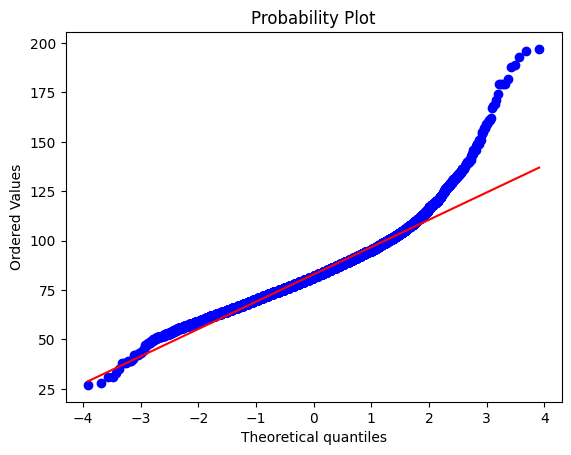

In [37]:
generate_qq_plot(data_df[target_dia])

Base Model

In [38]:
train_results_base_dia, test_results_base_dia, model_base_dia = fit_model(X_train_dia, Y_train_dia, X_test_dia,
                                                                        Y_test_dia, "LinearRegression")
model_base_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     421.9
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        15:39:23   Log-Likelihood:                -39185.
No. Observations:               10381   AIC:                         7.841e+04
Df Residuals:                   10360   BIC:                         7.856e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      22.1930      1.403     15.816      0.000      19.442      24.944
bundesland_Kärnten             -0.3932      1.513     -0.260      0.795      -3.359       2.572
bundesland_Niederösterreich    -0.0248      1.346     -0.018      0.985      -2.664       2.615
bundesland_Oberösterreich       0.1188      1.489      0.080      0.936      -2.801       3.038
bundesland_Salzburg            -0.5946      1.798     -0.331      0.741      -4.119       2.930
bundesland_Steiermark          -0.2447      1.201     -0.204      0.839      -2.599       2.110
bundesland_Tirol                1.5031      1.978      0.760      0.447      -2.374       5.380
bundesland_Vorarlberg           4.6008      2.600      1.770      0.077      -0.495       9.697
bundesland_Wien                 0.1489      1.331      0.112      0.911      -2.461       2.758
bundesland_not_applicable       0.2639      1.427      0.185      0.853      -2.533       3.060
befinden_2                     -0.7786      0.234     -3.330      0.001      -1.237      -0.320
befinden_3                     -0.9563      0.331     -2.891      0.004      -1.605      -0.308
befinden_4                     -1.3837      0.975     -1.419      0.156      -3.295       0.528
befinden_5                      4.7173      1.570      3.005      0.003       1.640       7.795
geschlecht_m                    1.3677      0.212      6.454      0.000       0.952       1.783
raucher_True                    0.6927      0.286      2.419      0.016       0.131       1.254
blutzucker_bekannt_True        -0.1631      0.295     -0.552      0.581      -0.742       0.416
cholesterin_bekannt_True        0.1906      0.274      0.696      0.486      -0.346       0.727
in_behandlung_True             -1.4618      0.336     -4.354      0.000      -2.120      -0.804
messwert_bp_sys                 0.5098      0.006     87.688      0.000       0.498       0.521
age                            -0.0698      0.007     -9.433      0.000      -0.084      -0.055
==============================================================================
Omnibus:                     1205.327   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3742.189
Skew:                           0.607   Prob(JB):                         0.00
Kurtosis:                       5.679   Cond. No.                     5.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
print(model_base_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      22.1930  &        1.403     &    15.816  &         0.000        &       19.442    &       24.944     \\
\textbf{bundesland\_Kärnten}          &      -0.3932  &        1.513     &    -0.260  &         0.795        &       -3.359    &        2.572     \\
\textbf{bundesland\_Niederösterreich} &      -0.0248  &        1.346     &    -0.018  &         0.985        &       -2.664    &        2.615     \\
\textbf{bundesland\_Oberösterreich}   &       0.1188  &        1.489     &     0.080  &         0.936        &       -2.801    &        3.038     \\
\textbf{bundesland\_Salzburg}         &      -0.5946  &        1.798     &    -0.331  &         0.741        &       -4.119    &        2.930     \\
\textbf{bundesland\_Steiermark}       &      -0.2

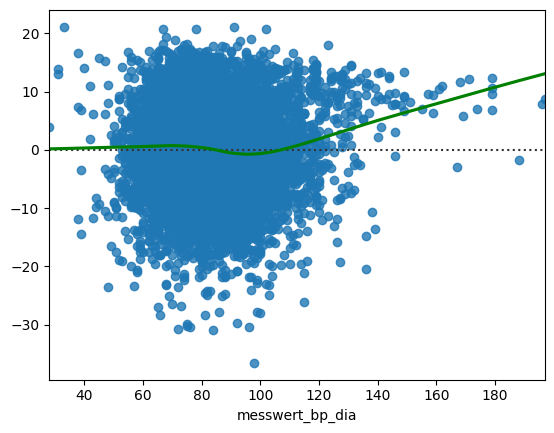

In [40]:
generate_residual_plot(Y_train_dia, model_base_dia)

Best Subset

In [41]:
model_type = "LinearRegression"
features = list(X_train_dia.columns)
model_best_dia, test_results_best_dia, train_results_best_dia = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_dia, Y_train_dia, X_test_dia, Y_test_dia,
                                                     model_type, {}, 1)


Best Model: 
Features:  ['blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'messwert_bp_sys', 'age']
Train Results:  {'r_2': 0.4444879937280789, 'adjusted_r_2': 0.4442202770985503, 'mse': 112.11487147576113}
Test Results:  {'r_2': 0.4499155588032405, 'adjusted_r_2': 0.4492966519162055, 'mse': 109.5471665723896}


In [42]:
model_best_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     1660.
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        15:39:30   Log-Likelihood:                -39227.
No. Observations:               10381   AIC:                         7.847e+04
Df Residuals:                   10375   BIC:                         7.851e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   21.8588      0.710     30.777      0.000      20.467      23.251
blutzucker_bekannt_True     -0.1559      0.296     -0.527      0.598      -0.736       0.424
cholesterin_bekannt_True     0.1215      0.274      0.443      0.658      -0.416       0.659
in_behandlung_True          -1.5736      0.335     -4.699      0.000      -2.230      -0.917
messwert_bp_sys              0.5151      0.006     89.191      0.000       0.504       0.526
age                         -0.0766      0.007    -10.593      0.000      -0.091      -0.062
==============================================================================
Omnibus:                     1262.358   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3944.591
Skew:                           0.634   Prob(JB):                         0.00
Kurtosis:                       5.741   Cond. No.                         929.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
print(model_best_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                    & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                  &      21.8588  &        0.710     &    30.777  &         0.000        &       20.467    &       23.251     \\
\textbf{blutzucker\_bekannt\_True}  &      -0.1559  &        0.296     &    -0.527  &         0.598        &       -0.736    &        0.424     \\
\textbf{cholesterin\_bekannt\_True} &       0.1215  &        0.274     &     0.443  &         0.658        &       -0.416    &        0.659     \\
\textbf{in\_behandlung\_True}       &      -1.5736  &        0.335     &    -4.699  &         0.000        &       -2.230    &       -0.917     \\
\textbf{messwert\_bp\_sys}          &       0.5151  &        0.006     &    89.191  &         0.000        &        0.504    &        0.526     \\
\textbf{age}                        &      -0.0766  &        

In [44]:
train_result_list = [train_results_base_dia, train_results_best_dia]

test_result_list = [test_results_base_dia, test_results_best_dia]

model_names = ["LM (Base)", "LM (Best Subset)"]

tab = tabularize_model_metrics(train_result_list, test_result_list, model_names)
round(tab, 3)

,Model,Train Mean Sq Error,Test Mean Sq Error,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,LM (Base),111.223,109.929,0.449,0.448,0.448,0.446
1,LM (Best Subset),109.547,112.115,0.450,0.444,0.449,0.444


In [45]:
print(tab.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
 & Model & Train Mean Sq Error & Test Mean Sq Error & Train R2 & Test R2 & Train Adjusted R2 & Test Adjusted R2 \\
\midrule
0 & LM (Base) & 111.223302 & 109.929192 & 0.448906 & 0.447997 & 0.447842 & 0.445505 \\
1 & LM (Best Subset) & 109.547167 & 112.114871 & 0.449916 & 0.444488 & 0.449297 & 0.444220 \\
\bottomrule
\end{tabular}



### Models for Systolic as target

In [46]:
target_sys = "messwert_bp_sys"
X_train_sys, Y_train_sys = separate_target(encoded_train_set, target_sys)
X_test_sys, Y_test_sys = separate_target(encoded_test_set, target_sys)

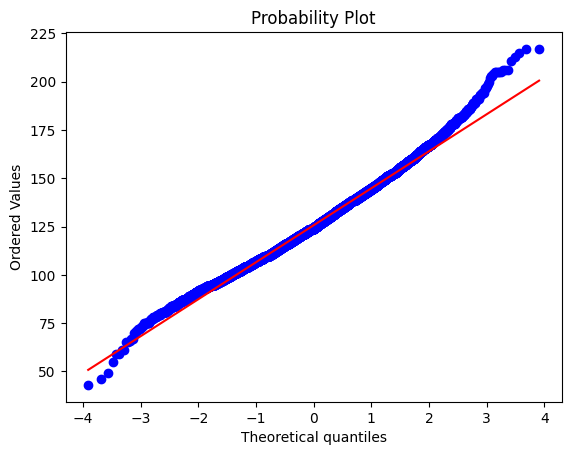

In [47]:
generate_qq_plot(data_df[target_sys])

Base Model

In [48]:
train_results_base_sys, test_results_base_sys, model_base_sys = fit_model(X_train_sys, Y_train_sys, X_test_sys,
                                                                        Y_test_sys, "LinearRegression")
model_base_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     530.6
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        15:39:30   Log-Likelihood:                -41751.
No. Observations:               10381   AIC:                         8.354e+04
Df Residuals:                   10360   BIC:                         8.370e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      45.9782      1.761     26.107      0.000      42.526      49.430
bundesland_Kärnten             -0.9639      1.937     -0.498      0.619      -4.761       2.833
bundesland_Niederösterreich    -2.7299      1.724     -1.584      0.113      -6.109       0.649
bundesland_Oberösterreich      -1.9659      1.907     -1.031      0.303      -5.704       1.772
bundesland_Salzburg            -4.7290      2.301     -2.055      0.040      -9.240      -0.218
bundesland_Steiermark          -2.0158      1.538     -1.311      0.190      -5.030       0.999
bundesland_Tirol               -5.8441      2.532     -2.308      0.021     -10.806      -0.882
bundesland_Vorarlberg          -5.4169      3.329     -1.627      0.104     -11.942       1.108
bundesland_Wien                -2.5782      1.704     -1.513      0.130      -5.919       0.763
bundesland_not_applicable      -3.3097      1.826     -1.812      0.070      -6.890       0.270
befinden_2                      0.8635      0.299      2.884      0.004       0.277       1.450
befinden_3                      0.6648      0.424      1.569      0.117      -0.166       1.495
befinden_4                      1.6862      1.249      1.350      0.177      -0.761       4.134
befinden_5                     -1.7915      2.011     -0.891      0.373      -5.733       2.150
geschlecht_m                    1.6412      0.271      6.047      0.000       1.109       2.173
raucher_True                   -0.5767      0.367     -1.572      0.116      -1.296       0.142
blutzucker_bekannt_True         0.8390      0.378      2.218      0.027       0.098       1.580
cholesterin_bekannt_True       -0.3263      0.351     -0.931      0.352      -1.014       0.361
in_behandlung_True              6.0755      0.426     14.258      0.000       5.240       6.911
messwert_bp_dia                 0.8357      0.010     87.688      0.000       0.817       0.854
age                             0.2302      0.009     24.920      0.000       0.212       0.248
==============================================================================
Omnibus:                      116.523   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.407
Skew:                           0.207   Prob(JB):                     6.51e-30
Kurtosis:                       3.373   Cond. No.                     3.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
print(model_base_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      45.9782  &        1.761     &    26.107  &         0.000        &       42.526    &       49.430     \\
\textbf{bundesland\_Kärnten}          &      -0.9639  &        1.937     &    -0.498  &         0.619        &       -4.761    &        2.833     \\
\textbf{bundesland\_Niederösterreich} &      -2.7299  &        1.724     &    -1.584  &         0.113        &       -6.109    &        0.649     \\
\textbf{bundesland\_Oberösterreich}   &      -1.9659  &        1.907     &    -1.031  &         0.303        &       -5.704    &        1.772     \\
\textbf{bundesland\_Salzburg}         &      -4.7290  &        2.301     &    -2.055  &         0.040        &       -9.240    &       -0.218     \\
\textbf{bundesland\_Steiermark}       &      -2.0

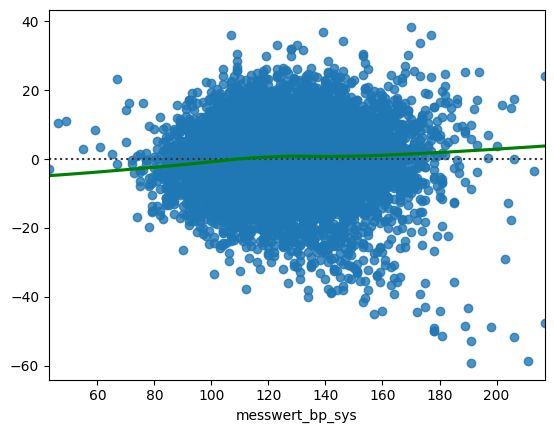

In [50]:
generate_residual_plot(Y_train_sys, model_base_sys)

Base Best Subset

In [51]:
model_type = "LinearRegression"
features = list(X_train_sys.columns)
model_best_sys, test_results_best_sys, train_results_best_sys = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_sys, Y_train_sys, X_test_sys, Y_test_sys,
                                                     model_type, {}, 1)


Best Model: 
Features:  ['bundesland_Oberösterreich', 'bundesland_Salzburg', 'bundesland_Steiermark', 'bundesland_Tirol', 'bundesland_Vorarlberg', 'bundesland_Wien', 'bundesland_not_applicable', 'befinden_2', 'befinden_3', 'befinden_4', 'befinden_5', 'geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'messwert_bp_dia', 'age']
Train Results:  {'r_2': 0.5058612561542914, 'adjusted_r_2': 0.5050028796450052, 'mse': 182.3883027017233}
Test Results:  {'r_2': 0.5169921444601913, 'adjusted_r_2': 0.515030027240666, 'mse': 179.80364209672553}


In [52]:
model_best_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     589.3
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        15:39:37   Log-Likelihood:                -41752.
No. Observations:               10381   AIC:                         8.354e+04
Df Residuals:                   10362   BIC:                         8.368e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    44.1251      1.048     42.097      0.000      42.070      46.180
bundesland_Oberösterreich    -0.1201      1.287     -0.093      0.926      -2.643       2.403
bundesland_Salzburg          -2.8850      1.822     -1.584      0.113      -6.456       0.686
bundesland_Steiermark        -0.1718      0.622     -0.276      0.782      -1.391       1.047
bundesland_Tirol             -4.0028      2.105     -1.901      0.057      -8.129       0.124
bundesland_Vorarlberg        -3.5809      3.019     -1.186      0.236      -9.498       2.336
bundesland_Wien              -0.7335      0.963     -0.761      0.447      -2.622       1.155
bundesland_not_applicable    -1.4668      1.165     -1.259      0.208      -3.750       0.817
befinden_2                    0.8522      0.299      2.847      0.004       0.265       1.439
befinden_3                    0.6662      0.424      1.573      0.116      -0.164       1.497
befinden_4                    1.7040      1.249      1.365      0.172      -0.744       4.152
befinden_5                   -1.7971      2.011     -0.894      0.372      -5.739       2.145
geschlecht_m                  1.6346      0.271      6.023      0.000       1.103       2.167
raucher_True                 -0.5820      0.367     -1.587      0.113      -1.301       0.137
blutzucker_bekannt_True       0.8331      0.378      2.203      0.028       0.092       1.575
cholesterin_bekannt_True     -0.3354      0.351     -0.957      0.339      -1.022       0.352
in_behandlung_True            6.0865      0.426     14.284      0.000       5.251       6.922
messwert_bp_dia               0.8359      0.010     87.715      0.000       0.817       0.855
age                           0.2302      0.009     24.925      0.000       0.212       0.248
==============================================================================
Omnibus:                      117.210   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.400
Skew:                           0.208   Prob(JB):                     3.96e-30
Kurtosis:                       3.375   Cond. No.                     2.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
print(model_best_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                     & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                   &      44.1251  &        1.048     &    42.097  &         0.000        &       42.070    &       46.180     \\
\textbf{bundesland\_Oberösterreich}  &      -0.1201  &        1.287     &    -0.093  &         0.926        &       -2.643    &        2.403     \\
\textbf{bundesland\_Salzburg}        &      -2.8850  &        1.822     &    -1.584  &         0.113        &       -6.456    &        0.686     \\
\textbf{bundesland\_Steiermark}      &      -0.1718  &        0.622     &    -0.276  &         0.782        &       -1.391    &        1.047     \\
\textbf{bundesland\_Tirol}           &      -4.0028  &        2.105     &    -1.901  &         0.057        &       -8.129    &        0.124     \\
\textbf{bundesland\_Vorarlberg}      &      -3.5809  & 

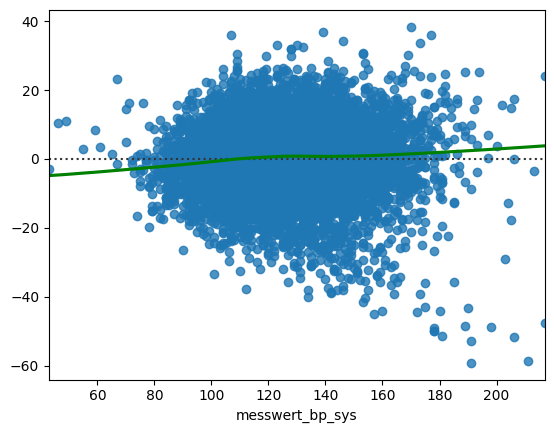

In [54]:
generate_residual_plot(Y_train_sys, model_best_sys)

In [55]:
train_result_list = [train_results_base_sys, train_results_best_sys]

test_result_list = [test_results_base_sys, test_results_best_sys]

model_names = ["LM (Base)", "LM (Best Subset)"]

tab = tabularize_model_metrics(train_result_list, test_result_list, model_names)
round(tab, 3)

,Model,Train Mean Sq Error,Test Mean Sq Error,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,LM (Base),182.331,180.027,0.506,0.516,0.505,0.514
1,LM (Best Subset),179.804,182.388,0.517,0.506,0.515,0.505


In [56]:
print(tab.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
 & Model & Train Mean Sq Error & Test Mean Sq Error & Train R2 & Test R2 & Train Adjusted R2 & Test Adjusted R2 \\
\midrule
0 & LM (Base) & 182.331082 & 180.027173 & 0.506016 & 0.516392 & 0.505063 & 0.514208 \\
1 & LM (Best Subset) & 179.803642 & 182.388303 & 0.516992 & 0.505861 & 0.515030 & 0.505003 \\
\bottomrule
\end{tabular}

